In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pickle

### Load our (merged) song dataset

In [2]:
songs_df = pd.read_csv('songs.csv')
songs_df.head()

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,hot
0,Taylor Swift,Anti-Hero,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,...,0.5330,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,1
1,Taylor Swift,Lavender Haze,0.733,0.436,10,-10.489,1,0.0800,0.2580,0.000573,...,0.0976,96.985,audio_features,5jQI2r1RdgtuT8S3iG8zFC,spotify:track:5jQI2r1RdgtuT8S3iG8zFC,https://api.spotify.com/v1/tracks/5jQI2r1Rdgtu...,https://api.spotify.com/v1/audio-analysis/5jQI...,202396,4,1
2,Taylor Swift,Maroon,0.637,0.398,7,-8.294,1,0.0564,0.0573,0.000001,...,0.0374,108.075,audio_features,3eX0NZfLtGzoLUxPNvRfqm,spotify:track:3eX0NZfLtGzoLUxPNvRfqm,https://api.spotify.com/v1/tracks/3eX0NZfLtGzo...,https://api.spotify.com/v1/audio-analysis/3eX0...,218271,4,1
3,Taylor Swift,Midnight Rain,0.643,0.363,0,-11.738,1,0.0767,0.6900,0.000052,...,0.2300,139.865,audio_features,3rWDp9tBPQR9z6U5YyRSK4,spotify:track:3rWDp9tBPQR9z6U5YyRSK4,https://api.spotify.com/v1/tracks/3rWDp9tBPQR9...,https://api.spotify.com/v1/audio-analysis/3rWD...,174783,4,1
4,Taylor Swift,Bejeweled,0.700,0.550,7,-9.130,1,0.0653,0.0661,0.000102,...,0.4120,164.003,audio_features,0jvo9CjnbR0lYUDTSNTMiu,spotify:track:0jvo9CjnbR0lYUDTSNTMiu,https://api.spotify.com/v1/tracks/0jvo9CjnbR0l...,https://api.spotify.com/v1/audio-analysis/0jvo...,194166,4,1


### Decided to use the following 10 features for fitting our clustering models:
* danceability
* energy
* key
* loudness
* speechiness
* acousticness
* instrumentalness
* liveness
* valence
* tempo

In [3]:
numerical_df = songs_df.select_dtypes(np.number)
X = numerical_df.drop(['mode', 'duration_ms', 'time_signature', 'hot'], axis=1)
X.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,0.603672,0.595231,5.073945,-9.054452,0.060825,0.333831,0.060518,0.185897,0.604919,118.367838
std,0.162868,0.229733,3.568638,3.837153,0.062196,0.321120,0.186724,0.155202,0.252399,26.882526
min,0.000000,0.019000,0.000000,-37.841000,0.000000,0.000011,0.000000,0.012400,0.000000,0.000000
25%,0.500000,0.445000,2.000000,-11.410500,0.031800,0.048100,0.000000,0.088100,0.403500,99.412500
50%,0.622000,0.625000,5.000000,-8.620000,0.039900,0.210000,0.000027,0.128000,0.632000,117.046000
75%,0.722000,0.777000,8.000000,-6.214000,0.060000,0.593000,0.002465,0.242000,0.819500,132.069000
max,0.979000,0.997000,11.000000,-0.810000,0.817000,0.996000,0.985000,0.989000,0.986000,210.857000


#### Apply StandardScaler

In [4]:
scaler = StandardScaler()
scaler.fit(X)

X_scaled    = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

filename = 'scalers/standard.pickle'

with open(filename, "wb") as file:
        pickle.dump(scaler, file)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.637,0.643,4,-6.571,0.0519,0.1300,0.000002,0.142,0.5330,97.008
1,0.733,0.436,10,-10.489,0.0800,0.2580,0.000573,0.157,0.0976,96.985
2,0.637,0.398,7,-8.294,0.0564,0.0573,0.000001,0.101,0.0374,108.075
3,0.643,0.363,0,-11.738,0.0767,0.6900,0.000052,0.115,0.2300,139.865
4,0.700,0.550,7,-9.130,0.0653,0.0661,0.000102,0.091,0.4120,164.003


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.204679,0.207977,-0.301005,0.647353,-0.143526,-0.634886,-0.324167,-0.282902,-0.285002,-0.794735
1,0.794242,-0.693264,1.380674,-0.373939,0.308374,-0.236195,-0.321107,-0.186233,-2.010424,-0.795591
2,0.204679,-0.858710,0.539835,0.198225,-0.071157,-0.861331,-0.324171,-0.547132,-2.248987,-0.382965
3,0.241527,-1.011093,-1.422125,-0.699511,0.255304,1.109387,-0.323899,-0.456907,-1.485743,0.799844
4,0.591580,-0.196929,0.539835,-0.019693,0.071971,-0.833921,-0.323630,-0.611578,-0.764506,1.697947


#### Fitting model

In [5]:
kmeans = KMeans(n_clusters=8, random_state=1234, verbose=1)
kmeans.fit(X_scaled_df)

Initialization complete
Iteration 0, inertia 18767.74906877044.
Iteration 1, inertia 14318.860564072984.
Iteration 2, inertia 13506.35914710625.
Iteration 3, inertia 13064.972942890088.
Iteration 4, inertia 12700.136941107303.
Iteration 5, inertia 12418.126349509663.
Iteration 6, inertia 12297.790729826313.
Iteration 7, inertia 12206.304117858228.
Iteration 8, inertia 12104.76837345029.
Iteration 9, inertia 12007.872101888232.
Iteration 10, inertia 11971.816201805173.
Iteration 11, inertia 11955.532591668405.
Iteration 12, inertia 11948.77734561941.
Iteration 13, inertia 11944.146313508023.
Iteration 14, inertia 11941.53759811693.
Iteration 15, inertia 11939.077006229038.
Iteration 16, inertia 11937.028299763322.
Iteration 17, inertia 11935.617403650504.
Iteration 18, inertia 11934.74456140772.
Iteration 19, inertia 11934.580772532494.
Iteration 20, inertia 11934.538427602856.
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 17535.720514629804

Iteration 28, inertia 11933.395674768746.
Iteration 29, inertia 11933.358929286904.
Converged at iteration 29: strict convergence.
Initialization complete
Iteration 0, inertia 17767.75214016051.
Iteration 1, inertia 13648.117854136104.
Iteration 2, inertia 13382.919539526163.
Iteration 3, inertia 13330.368775793973.
Iteration 4, inertia 13307.053628714446.
Iteration 5, inertia 13274.72066649208.
Iteration 6, inertia 13197.744548071707.
Iteration 7, inertia 13010.146774745424.
Iteration 8, inertia 12855.82714504491.
Iteration 9, inertia 12808.108065007169.
Iteration 10, inertia 12792.01796360261.
Iteration 11, inertia 12782.488526993626.
Iteration 12, inertia 12776.457087031336.
Iteration 13, inertia 12773.814903726809.
Iteration 14, inertia 12772.347286721766.
Iteration 15, inertia 12771.606738475812.
Iteration 16, inertia 12771.428564904258.
Iteration 17, inertia 12771.258059698941.
Iteration 18, inertia 12771.1388166926.
Converged at iteration 18: strict convergence.
Initialization c

KMeans(random_state=1234, verbose=1)

#### Predict clustering

In [6]:
clusters = kmeans.predict(X_scaled_df)
pd.Series(clusters).value_counts().sort_index() # Number of wines in each cluster

0    155
1    385
2    282
3    487
4    287
5    495
6     88
7    120
dtype: int64

#### Show inertia

In [7]:
kmeans.inertia_

11864.394329580693

#### Finding the best k (n_neighbours) value

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

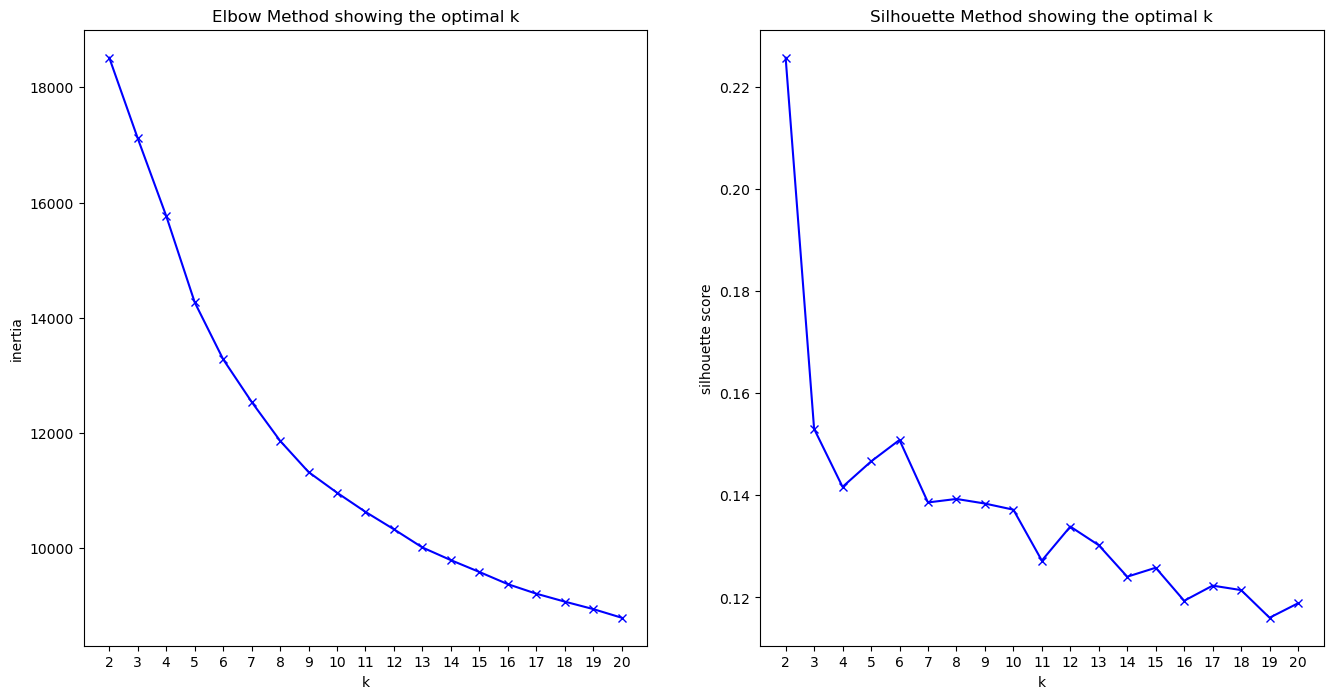

In [8]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    #print("Training a K-Means model with {} clusters! ".format(k))

    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "models/kmeans_" + str(k) + ".pickle" # Path with filename
    
    with open(filename, "wb") as file:
        pickle.dump(kmeans, file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

### Add cluster identifier to song dataset
####  k=4

In [9]:
filepath = 'models/kmeans_4.pickle'

with open(filepath, 'rb') as file:
    kmeans = pickle.load(file)

clusters = kmeans.predict(X_scaled_df)
songs_df['cluster_kmeans_4'] = kmeans.predict(X_scaled_df)

####  k=11

In [10]:
filepath = 'models/kmeans_11.pickle'

with open(filepath, 'rb') as file:
    kmeans = pickle.load(file)

clusters = kmeans.predict(X_scaled_df)
songs_df['cluster_kmeans_11'] = kmeans.predict(X_scaled_df)

#### k=16

In [11]:
filepath = 'models/kmeans_16.pickle'

with open(filepath, 'rb') as file:
    kmeans = pickle.load(file)

clusters = kmeans.predict(X_scaled_df)
songs_df['cluster_kmeans_16'] = kmeans.predict(X_scaled_df)

In [12]:
songs_df.head()

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,hot,cluster_kmeans_4,cluster_kmeans_11,cluster_kmeans_16
0,Taylor Swift,Anti-Hero,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,...,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,1,1,4,9
1,Taylor Swift,Lavender Haze,0.733,0.436,10,-10.489,1,0.0800,0.2580,0.000573,...,5jQI2r1RdgtuT8S3iG8zFC,spotify:track:5jQI2r1RdgtuT8S3iG8zFC,https://api.spotify.com/v1/tracks/5jQI2r1Rdgtu...,https://api.spotify.com/v1/audio-analysis/5jQI...,202396,4,1,0,9,7
2,Taylor Swift,Maroon,0.637,0.398,7,-8.294,1,0.0564,0.0573,0.000001,...,3eX0NZfLtGzoLUxPNvRfqm,spotify:track:3eX0NZfLtGzoLUxPNvRfqm,https://api.spotify.com/v1/tracks/3eX0NZfLtGzo...,https://api.spotify.com/v1/audio-analysis/3eX0...,218271,4,1,3,9,9
3,Taylor Swift,Midnight Rain,0.643,0.363,0,-11.738,1,0.0767,0.6900,0.000052,...,3rWDp9tBPQR9z6U5YyRSK4,spotify:track:3rWDp9tBPQR9z6U5YyRSK4,https://api.spotify.com/v1/tracks/3rWDp9tBPQR9...,https://api.spotify.com/v1/audio-analysis/3rWD...,174783,4,1,0,1,2
4,Taylor Swift,Bejeweled,0.700,0.550,7,-9.130,1,0.0653,0.0661,0.000102,...,0jvo9CjnbR0lYUDTSNTMiu,spotify:track:0jvo9CjnbR0lYUDTSNTMiu,https://api.spotify.com/v1/tracks/0jvo9CjnbR0l...,https://api.spotify.com/v1/audio-analysis/0jvo...,194166,4,1,3,10,12


#### Store songs dataset to file

In [13]:
songs_df.to_csv('songs_clustered.csv')